In [1]:
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

import fileio

In [2]:
infile = '/g/data/xv83/dcfp/CAFE-f6/c5-d60-pX-f6-19900501/atmos_isobaric_daily.zarr.zip'

In [3]:
ds = xr.open_zarr(infile, consolidated=True, use_cftime=True)
ds

<xarray.Dataset>
Dimensions:         (ensemble: 96, lat: 90, latb: 91, level: 21, lon: 144, lonb: 145, nv: 2, time: 3653)
Coordinates: (12/14)
    area            (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT      (time) timedelta64[ns] dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T1      (time) object dask.array<chunksize=(3653,), meta=np.ndarray>
    average_T2      (time) object dask.array<chunksize=(3653,), meta=np.ndarray>
  * ensemble        (ensemble) int64 1 2 3 4 5 6 7 8 ... 89 90 91 92 93 94 95 96
  * lat             (lat) float64 -89.49 -87.98 -85.96 ... 85.96 87.98 89.49
    ...              ...
  * lon             (lon) float64 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * lonb            (lonb) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5 360.0
  * nv              (nv) float64 1.0 2.0
  * time            (time) object 1990-05-01 12:00:00 ... 2000-04-30 12:00:00
    time_bounds     (time, nv) timedelta64[ns] dask.array<chunksize=(3653, 2), meta=np.ndarray>
    zsurf           (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
Data variables: (12/38)
    DELP            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    awp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    evap            (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    h500            (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    hght            (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    lwdn_sfc        (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    ...              ...
    u_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    ucomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    v_ref           (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    vcomp           (time, ensemble, level, lat, lon) float32 dask.array<chunksize=(28, 96, 1, 90, 144), meta=np.ndarray>
    vis_exopd_vl_c  (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
    wvp             (time, ensemble, lat, lon) float32 dask.array<chunksize=(28, 96, 90, 144), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    title:      AccessOcean-AM2

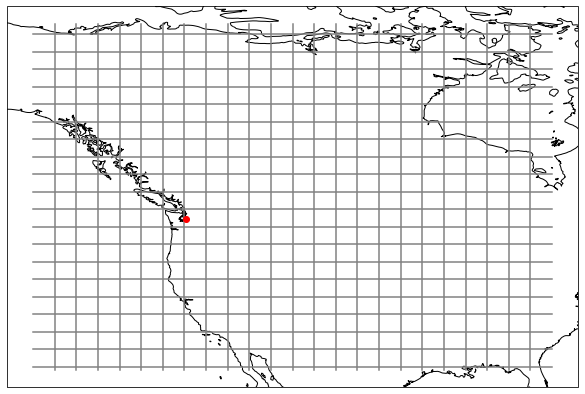

In [4]:
fig = plt.figure(figsize=(12, 7))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines()

min_lat = 30
max_lat = 70

min_lon = 220
max_lon = 280

#plt.plot([0, 359], [50, 50],
#         color='gray', linestyle='--',
#         transform=ccrs.PlateCarree(),)

for lat in ds['latb'].values:
    if (lat < max_lat) and (lat > min_lat):
        plt.plot([min_lon, max_lon], [lat, lat],
                 color='gray',
                 transform=ccrs.PlateCarree(),
                )

for lon in ds['lonb'].values:
    if (lon < max_lon) and (lon > min_lon):
        plt.plot([lon, lon], [min_lat, max_lat],
                 color='gray',
                 transform=ccrs.PlateCarree(),
                )

plt.plot(-122.31, 47.45, 'ro', transform=ccrs.PlateCarree())
        
plt.show()

In [5]:
ds['latb'].values

array([-90.        , -88.98876404, -86.96629213, -84.94382022,
       -82.92134831, -80.8988764 , -78.87640449, -76.85393258,
       -74.83146067, -72.80898876, -70.78651685, -68.76404494,
       -66.74157303, -64.71910112, -62.69662921, -60.6741573 ,
       -58.65168539, -56.62921348, -54.60674157, -52.58426966,
       -50.56179775, -48.53932584, -46.51685393, -44.49438202,
       -42.47191011, -40.4494382 , -38.42696629, -36.40449438,
       -34.38202247, -32.35955056, -30.33707865, -28.31460674,
       -26.29213483, -24.26966292, -22.24719101, -20.2247191 ,
       -18.20224719, -16.17977528, -14.15730337, -12.13483146,
       -10.11235955,  -8.08988764,  -6.06741573,  -4.04494382,
        -2.02247191,   0.        ,   2.02247191,   4.04494382,
         6.06741573,   8.08988764,  10.11235955,  12.13483146,
        14.15730337,  16.17977528,  18.20224719,  20.2247191 ,
        22.24719101,  24.26966292,  26.29213483,  28.31460674,
        30.33707865,  32.35955056,  34.38202247,  36.40

In [6]:
ds['lonb'].values

array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,
        22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,
        45. ,  47.5,  50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,
        67.5,  70. ,  72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,
        90. ,  92.5,  95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ,
       112.5, 115. , 117.5, 120. , 122.5, 125. , 127.5, 130. , 132.5,
       135. , 137.5, 140. , 142.5, 145. , 147.5, 150. , 152.5, 155. ,
       157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
       180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5, 200. ,
       202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. ,
       247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5,
       270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5, 290. ,
       292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. , 312.5,
       315. , 317.5,

In [7]:
360 -122.31

237.69